<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Data Analysis</center></h1>
<h2><center>Seminar: PCA. t-SNE. </center></h2>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

# PCA

Lets try to use PCA on some dataset with various different ways

In [2]:
# Load data
df_wine = pd.read_csv('data/winequality-red.csv', sep=';')

# Make classification target feature
df_wine.loc[:, 'quality_cat'] = (df_wine.quality > 5).astype(int)
df_wine = df_wine.drop('quality', axis=1)

# Get descriptive and target features
X = df_wine.iloc[:, :-1].values
y = df_wine.iloc[:, -1].values

In [3]:
X.shape

(1599, 11)

In [4]:
y

array([0, 0, 0, ..., 1, 0, 1])

## PCA via sklearn

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=5)

In [7]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
PC = pca.transform(X)

In [9]:
PC.shape

(1599, 5)

In [11]:
pca.components_.shape

(5, 11)

In [13]:
PC[:4]

array([[-13.22490501,  -2.02389981,  -1.12682053,  -0.39923318,
         -1.08538902],
       [ 22.03772361,   4.40832155,  -0.31037799,  -0.19993774,
         -0.55710939],
       [  7.16267333,  -2.50146086,  -0.5818683 ,  -0.21906928,
         -0.55293355],
       [ 13.43006283,  -1.95112215,   2.63403954,  -1.5740594 ,
         -0.06380573]])

In [15]:
PC1 = X.dot(pca.components_.T)

In [17]:
PC1[:4]
# Получилось что-то не то
# потому что X не центрирован (и не отшкалировано)

array([[ 35.49124148,   3.27633804,   7.09548962,   1.39282058,
          9.86729436],
       [ 70.75387009,   9.7085594 ,   7.91193216,   1.59211602,
         10.39557399],
       [ 55.87881981,   2.79877699,   7.64044185,   1.57298448,
         10.39974983],
       [ 62.14620931,   3.3491157 ,  10.85634969,   0.21799436,
         10.88887765]])

In [19]:
X_ = (X - X.mean(axis=0))

In [20]:
PC1 = X_.dot(pca.components_.T)

In [22]:
PC[:4]

array([[-13.22490501,  -2.02389981,  -1.12682053,  -0.39923318,
         -1.08538902],
       [ 22.03772361,   4.40832155,  -0.31037799,  -0.19993774,
         -0.55710939],
       [  7.16267333,  -2.50146086,  -0.5818683 ,  -0.21906928,
         -0.55293355],
       [ 13.43006283,  -1.95112215,   2.63403954,  -1.5740594 ,
         -0.06380573]])

In [21]:
PC1[:4]

array([[-13.22490501,  -2.02389981,  -1.12682053,  -0.39923318,
         -1.08538902],
       [ 22.03772361,   4.40832155,  -0.31037799,  -0.19993774,
         -0.55710939],
       [  7.16267333,  -2.50146086,  -0.5818683 ,  -0.21906928,
         -0.55293355],
       [ 13.43006283,  -1.95112215,   2.63403954,  -1.5740594 ,
         -0.06380573]])

In [23]:
# Желательно еще и шкалировать признаки
X_ = (X - X.mean(axis=0))/X.std(axis=0)

## PCA via covariance matrix 

In [53]:
from numpy.linalg import eig

In [54]:
C = X_.T.dot(X_)
# Матрица ковариаций

In [55]:
lmbd, A = eig(C)

In [56]:
A.shape

(11, 11)

In [57]:
lmbd.shape

(11,)

In [58]:
pca = PCA(n_components=5)
pca.fit(X_)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [59]:
A[:4] # c точностью до транспонирования.

array([[ 0.48931422, -0.11050274, -0.12330157, -0.22961737, -0.08261366,
        -0.63969145, -0.24952314,  0.19402091, -0.17759545, -0.35022736,
         0.10147858],
       [-0.23858436,  0.27493048, -0.44996253,  0.07895978,  0.21873452,
        -0.0023886 ,  0.36592473, -0.1291103 , -0.07877531, -0.5337351 ,
         0.41144893],
       [ 0.46363166, -0.15179136,  0.23824707, -0.07941826, -0.05857268,
         0.0709103 ,  0.62167708, -0.38144967, -0.37751558,  0.10549701,
         0.06959338],
       [ 0.14610715,  0.27208024,  0.10128338, -0.37279256,  0.73214429,
        -0.18402996,  0.09287208,  0.00752295,  0.29984469,  0.29066341,
         0.04915555]])

In [60]:
pca.components_[:4]

array([[ 0.48931422, -0.23858436,  0.46363166,  0.14610715,  0.21224658,
        -0.03615752,  0.02357485,  0.39535301, -0.43851962,  0.24292133,
        -0.11323206],
       [-0.11050274,  0.27493048, -0.15179136,  0.27208024,  0.14805156,
         0.51356681,  0.56948696,  0.23357549,  0.00671079, -0.03755392,
        -0.38618096],
       [-0.12330157, -0.44996253,  0.23824707,  0.10128338, -0.09261383,
         0.42879287,  0.3224145 , -0.33887135,  0.05769735,  0.27978615,
         0.47167322],
       [-0.22961737,  0.07895978, -0.07941826, -0.37279256,  0.66619476,
        -0.04353782, -0.03457712, -0.17449976, -0.00378775,  0.55087236,
        -0.12218109]])

In [61]:
A = A[:,:5].T

In [62]:
pca.components_[:4]

array([[ 0.48931422, -0.23858436,  0.46363166,  0.14610715,  0.21224658,
        -0.03615752,  0.02357485,  0.39535301, -0.43851962,  0.24292133,
        -0.11323206],
       [-0.11050274,  0.27493048, -0.15179136,  0.27208024,  0.14805156,
         0.51356681,  0.56948696,  0.23357549,  0.00671079, -0.03755392,
        -0.38618096],
       [-0.12330157, -0.44996253,  0.23824707,  0.10128338, -0.09261383,
         0.42879287,  0.3224145 , -0.33887135,  0.05769735,  0.27978615,
         0.47167322],
       [-0.22961737,  0.07895978, -0.07941826, -0.37279256,  0.66619476,
        -0.04353782, -0.03457712, -0.17449976, -0.00378775,  0.55087236,
        -0.12218109]])

In [63]:
pca.components_.shape

(5, 11)

In [64]:
A.shape

(5, 11)

In [65]:
A[:4]

array([[ 0.48931422, -0.23858436,  0.46363166,  0.14610715,  0.21224658,
        -0.03615752,  0.02357485,  0.39535301, -0.43851962,  0.24292133,
        -0.11323206],
       [-0.11050274,  0.27493048, -0.15179136,  0.27208024,  0.14805156,
         0.51356681,  0.56948696,  0.23357549,  0.00671079, -0.03755392,
        -0.38618096],
       [-0.12330157, -0.44996253,  0.23824707,  0.10128338, -0.09261383,
         0.42879287,  0.3224145 , -0.33887135,  0.05769735,  0.27978615,
         0.47167322],
       [-0.22961737,  0.07895978, -0.07941826, -0.37279256,  0.66619476,
        -0.04353782, -0.03457712, -0.17449976, -0.00378775,  0.55087236,
        -0.12218109]])

In [66]:
PC_eig = X_.dot(A.T)
PC = pca.transform(X_)

In [67]:
PC_eig[:4]

array([[-1.61952988,  0.45095009, -1.77445415,  0.04374031,  0.06701448],
       [-0.79916993,  1.85655306, -0.91169017,  0.54806597, -0.01839156],
       [-0.74847909,  0.88203886, -1.17139423,  0.41102067, -0.04353101],
       [ 2.35767263, -0.26997601,  0.2434887 , -0.92844998, -1.49914907]])

In [68]:
PC[:4]

array([[-1.61952988,  0.45095009, -1.77445415,  0.04374031,  0.06701448],
       [-0.79916993,  1.85655306, -0.91169017,  0.54806597, -0.01839156],
       [-0.74847909,  0.88203886, -1.17139423,  0.41102067, -0.04353101],
       [ 2.35767263, -0.26997601,  0.2434887 , -0.92844998, -1.49914907]])

In [69]:
# вроде совпало

In [71]:
pca.explained_variance_ratio_ # относительный
# вклад каждой компоненты

array([ 0.28173931,  0.1750827 ,  0.1409585 ,  0.11029387,  0.08720837])

In [74]:
expl_rat = lmbd/lmbd.sum()
expl_rat

array([ 0.28173931,  0.1750827 ,  0.1409585 ,  0.11029387,  0.08720837,
        0.00541439,  0.01648483,  0.0313311 ,  0.03845061,  0.05307193,
        0.05996439])

In [75]:
np.cumsum(expl_rat)

array([ 0.28173931,  0.45682201,  0.59778051,  0.70807438,  0.79528275,
        0.80069714,  0.81718197,  0.84851307,  0.88696368,  0.94003561,  1.        ])

## PCA via SVD

## Singular Value Decomposition

Each matrix $X$ of size $n \times m$ and rank $r$ can be decomposed as:
$$ X = U S V^\top ,$$
where 
* $U$ - unary matrix, consists of eigenvectors of $XX^\top$
* $V$ - unary matrix, consists of eigenvectors of $X^\top X$
* $S$ - diagonal matrix with singular values $s_i = \sqrt{\lambda_i}$

<img src='img/pca_svd.png'>

In [76]:
from numpy.linalg import svd

In [77]:
U, S, V_T = svd(X_, full_matrices=0)

In [78]:
U.shape

(1599, 11)

In [79]:
S.shape

(11,)

In [80]:
V_T.shape

(11, 11)

In [82]:
V_T[:4]

array([[ 0.48931422, -0.23858436,  0.46363166,  0.14610715,  0.21224658,
        -0.03615752,  0.02357485,  0.39535301, -0.43851962,  0.24292133,
        -0.11323206],
       [-0.11050274,  0.27493048, -0.15179136,  0.27208024,  0.14805156,
         0.51356681,  0.56948696,  0.23357549,  0.00671079, -0.03755392,
        -0.38618096],
       [ 0.12330157,  0.44996253, -0.23824707, -0.10128338,  0.09261383,
        -0.42879287, -0.3224145 ,  0.33887135, -0.05769735, -0.27978615,
        -0.47167322],
       [-0.22961737,  0.07895978, -0.07941826, -0.37279256,  0.66619476,
        -0.04353782, -0.03457712, -0.17449976, -0.00378775,  0.55087236,
        -0.12218109]])

In [89]:
V = V_T.T

In [91]:
X_.dot(V[:,:5])

array([[-1.61952988,  0.45095009,  1.77445415,  0.04374031, -0.06701448],
       [-0.79916993,  1.85655306,  0.91169017,  0.54806597,  0.01839156],
       [-0.74847909,  0.88203886,  1.17139423,  0.41102067,  0.04353101],
       ..., 
       [-1.45612897,  0.31174559, -1.12423941,  0.49187676, -0.19371564],
       [-2.27051793,  0.97979111, -0.62796456,  0.63977007, -0.06773549],
       [-0.42697475, -0.53669021, -1.6289552 , -0.39171595, -0.45048209]])

In [85]:
PC[:4]

array([[-1.61952988,  0.45095009, -1.77445415,  0.04374031,  0.06701448],
       [-0.79916993,  1.85655306, -0.91169017,  0.54806597, -0.01839156],
       [-0.74847909,  0.88203886, -1.17139423,  0.41102067, -0.04353101],
       [ 2.35767263, -0.26997601,  0.2434887 , -0.92844998, -1.49914907]])

In [81]:
A[:4]

array([[ 0.48931422, -0.23858436,  0.46363166,  0.14610715,  0.21224658,
        -0.03615752,  0.02357485,  0.39535301, -0.43851962,  0.24292133,
        -0.11323206],
       [-0.11050274,  0.27493048, -0.15179136,  0.27208024,  0.14805156,
         0.51356681,  0.56948696,  0.23357549,  0.00671079, -0.03755392,
        -0.38618096],
       [-0.12330157, -0.44996253,  0.23824707,  0.10128338, -0.09261383,
         0.42879287,  0.3224145 , -0.33887135,  0.05769735,  0.27978615,
         0.47167322],
       [-0.22961737,  0.07895978, -0.07941826, -0.37279256,  0.66619476,
        -0.04353782, -0.03457712, -0.17449976, -0.00378775,  0.55087236,
        -0.12218109]])

# Quality and number of components

Build 2 pipelines:
    * StandartScaler + LogisticRegression
    * StandartScaler + PCA + LogisticRegression

Investigate accuracy of the second pipeline w.r.t. number of components in PCA. Compare it with the first pipeline.

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [94]:
model1 = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

model2 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('clf', LogisticRegression())
])


In [95]:
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

In [99]:
base_score = cross_val_score(model1, X, y, cv=cv, 
                             scoring='accuracy').mean()

In [100]:
base_score

0.74546434169278997

In [103]:
n_comp = range(1, 12)
scores = list()

for k in n_comp:
    model2 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=k)),
    ('clf', LogisticRegression())
    ])

    scores.append(\
    cross_val_score(model2, X, y, cv=cv,
                    scoring='accuracy').mean()
                 )

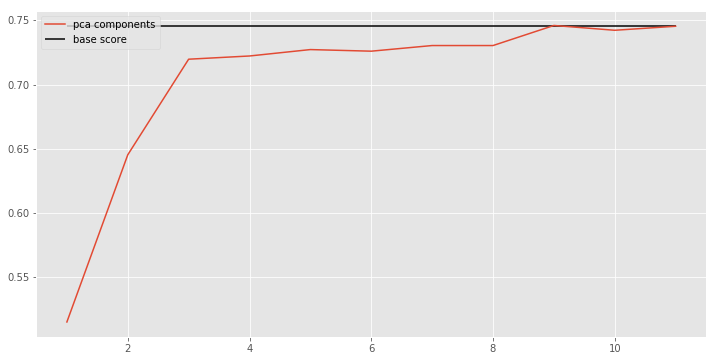

In [106]:
plt.plot(n_comp, scores, label='pca components')
plt.hlines(base_score, n_comp[0], n_comp[-1], label='base score')
plt.legend()

# t-SNE and Digits

In [ ]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

Run T-SNE on digits data. Investigate the incluence of `perplexity` parameter.